In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

In [39]:
rng = np.random.default_rng(1)
n = 5000
x = rng.normal(size=n)
y = x - 2*x**2 + rng.normal(size=n)

* n: 100, the size of the data (number of observations)
* p: number of predictors. In this case, there is only one predictor: $x$

The data was generated using the equation:

$$y = x - 2x^2 + \epsilon$$

$$\epsilon \sim \mathcal{N}(0,1)$$

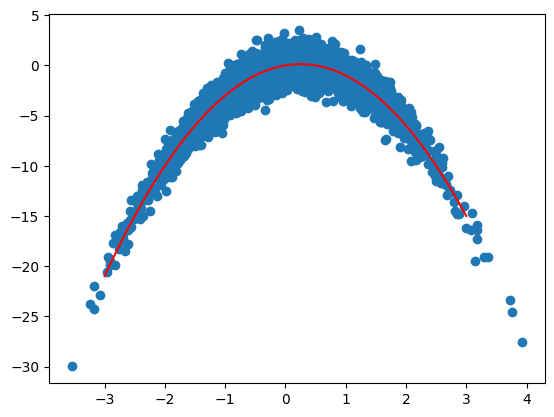

In [40]:
x_plot = np.linspace(-3, 3)
plt.scatter(x, y)
plt.plot(x_plot, x_plot - 2*x_plot**2, 'r')

In [77]:
# Create dataset with linear, quadratic, cubic and quartic columns
rng = np.random.default_rng(20)
n = 100
x = rng.normal(size=n)

df = pd.DataFrame({
    'x': x,
    'x^2': x**2,
    'x^3': x**3,
    'x^4': x**4,
    'y': x - 2*x**2 + rng.normal(size=n)
})

df.head()

,x,x^2,x^3,x^4,y
0,-0.359668,0.129361,-0.046527,0.016734,1.851173
1,1.203675,1.448834,1.743925,2.099119,-2.362257
2,1.396868,1.951241,2.725626,3.807340,-2.015460
3,0.317236,0.100639,0.031926,0.010128,0.000103
4,0.414134,0.171507,0.071027,0.029415,-2.297283


In [89]:
def LOOCV_score(columns, data_full):
    loo = LeaveOneOut()
    error = 0
    for i, fold in enumerate(loo.split(data_full)):
        # fit model with each fold
        data = data_full.iloc[fold[0]]
        X = data[columns]
        y = data.y

        model = LinearRegression(fit_intercept=True)
        model.fit(X.values, y.values)

        predicted = model.predict(np.array(data_full.iloc[i].loc[columns]).reshape(1,-1))[0]
        actual_value = data_full.y.iloc[i]
        #print(i, predicted, actual_value)
        error = (predicted - actual_value)**2

    return 1-np.sqrt(error/data_full.shape[0])

In [90]:
columns = ['x', 'x^2', 'x^3', 'x^4']

for c in range(1, len(columns)+1):
    score = LOOCV_score(columns[:c], df)
    print(f'Score for columns {columns[:c]}: {score}')

Score for columns ['x']: 0.9934242181869769
Score for columns ['x', 'x^2']: 0.9277712088683738
Score for columns ['x', 'x^2', 'x^3']: 0.940593802435166
Score for columns ['x', 'x^2', 'x^3', 'x^4']: 0.9298232254058209
